In [1]:
from self_organizing_map import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
import matplotlib.ticker as mticker
import parse
s_fmt = mticker.ScalarFormatter(useMathText=True)

sns.set_theme(context='paper', style='whitegrid', palette='Dark2', font_scale=.75)  # for plots
pylab.rcParams['figure.dpi'] = 150

In [57]:
# animals

# load data
animals_fts = np.fromfile('data/animals.dat', sep=',')
animals_fts = animals_fts.reshape((32, 84))
labels = []
with open('data/animalnames.txt', 'r') as fp:
    for line in fp.readlines():
        labels.append(line.strip()[1:-1])
        # [1: -1] is to remove extra quotation marks

som = SelfOrganizingMap(
    topology=LinearSOMTopology(nnodes=100,
                               starting_neighbor_d=50,
                               neighborhood_decay_fn=lambda d0, d, epoch: d0 - int(2.5 * epoch)))
som.train(animals_fts, n_epochs=25, eta=0.25)
results = som.map(animals_fts)

animal_df = pd.DataFrame(data={'animal': labels, 'node': results}) \
    .set_index('animal')
animal_df = animal_df.sort_values('node')
animal_df

,node
animal,
horse,0
camel,1
pig,2
giraffe,4
antelop,6
kangaroo,10
rabbit,13
elephant,15
bat,20


City coords: 
[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]


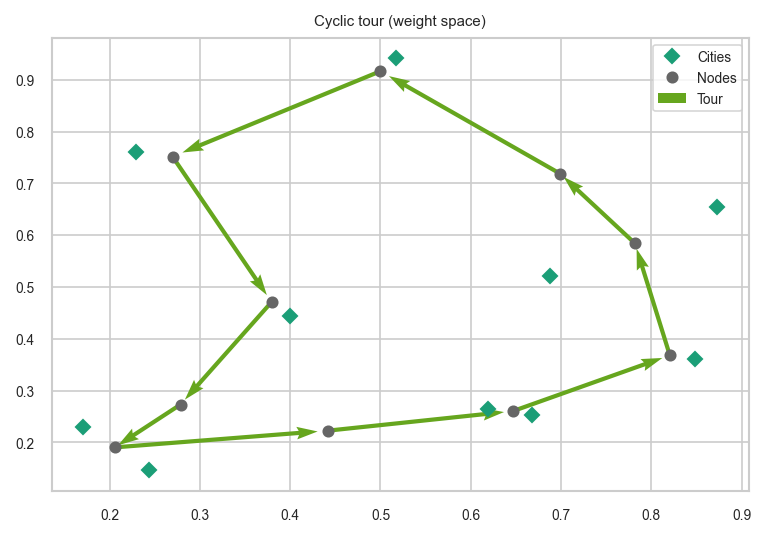

In [58]:
# cyclic tour

# load data
cities = []
with open('data/cities.dat', 'r') as fp:
    for line in fp.readlines():
        if line.startswith('%'):
            # skip comments
            continue
            
        tokens = parse.search('{x_coord:f}, {y_coord:f};', line)
        if tokens is not None:
            cities.append([tokens['x_coord'], tokens['y_coord']])

cities = np.array(cities)
            
som = SelfOrganizingMap(
    topology=CircularSOMTopology(nnodes=10,
                                   starting_neighbor_d=2,
                                   neighborhood_decay_fn=lambda d0, d, epoch: d0 - (epoch // 10)))
som.train(cities, n_epochs=25, eta=0.25)
tour = som.get_weights()

fig, ax = plt.subplots()
cmap = plt.cm.get_cmap('Dark2', 3)
ax.plot(cities[:, 0], cities[:, 1], 'D', label='Cities', color=cmap(0))

x = tour[:, 0]
x = np.append(x, x[0])
y = tour[:, 1]
y = np.append(y, y[0])
ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1.05, color=cmap(1), width=0.006, label='Tour')
ax.plot(tour[:, 0], tour[:, 1], 'o', label='Nodes', color=cmap(2))
ax.legend()
ax.set_title('Cyclic tour (weight space)')

plt.show()


In [4]:
# mps
som = SelfOrganizingMap(GridSOMTopology(nrows=10, ncols=10, starting_neighbor_d=6,
                                   neighborhood_decay_fn=lambda d0, d, epoch: int(np.ceil( d0 * (26 - epoch) / epoch ))))

# load data
votes = np.fromfile('data/votes.dat', sep=',').reshape((349, 31))

# load labels
sex = np.loadtxt('data/mpsex.dat', comments='%')
party = np.loadtxt('data/mpparty.dat', comments='%')
district = np.loadtxt('data/mpdistrict.dat')


som.train(votes, eta=0.25, n_epochs=25)

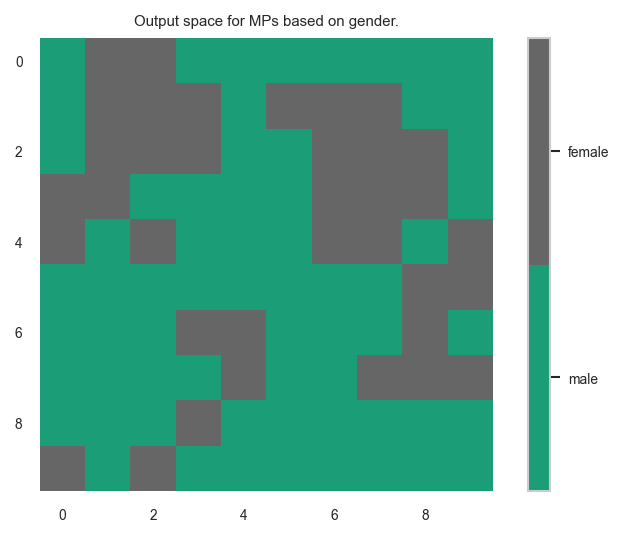

In [5]:
# plot by gender

sex_map = som.map_labels_to_output_space(votes, sex)
fig, ax = plt.subplots()
mappable = ax.imshow(sex_map, cmap=plt.cm.get_cmap('Dark2', 2))

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: ['male', 'female'][val])

# We must be sure to specify the ticks matching our target names
cbar = plt.colorbar(mappable, ticks=[0, 1], format=formatter, ax=ax);

# Set the clim so that labels are centered on each block
mappable.set_clim(-0.5, 1.5)

for _, spine in ax.spines.items():
    spine.set_visible(False)

ax.grid(False)

ax.set_title('Output space for MPs based on gender.')
plt.show()

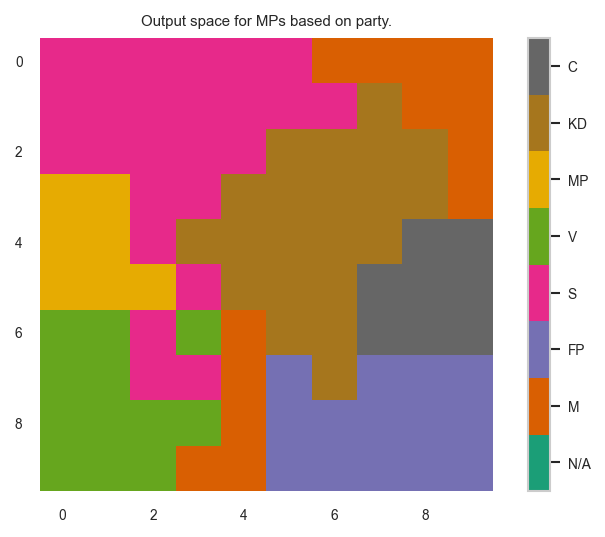

In [6]:
# plot by party

party_map = som.map_labels_to_output_space(votes, party)
party_labels = ['N/A', 'M', 'FP', 'S', 'V', 'MP', 'KD', 'C']
n_parties = len(party_labels)

fig, ax = plt.subplots()
mappable = ax.imshow(party_map, cmap=plt.cm.get_cmap('Dark2', n_parties))

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: party_labels[val])

# We must be sure to specify the ticks matching our target names
cbar = plt.colorbar(mappable, ticks=list(range(n_parties)), format=formatter, ax=ax);

# Set the clim so that labels are centered on each block
mappable.set_clim(-0.5, n_parties - 0.5)

for _, spine in ax.spines.items():
    spine.set_visible(False)

ax.grid(False)

ax.set_title('Output space for MPs based on party.')
plt.show()

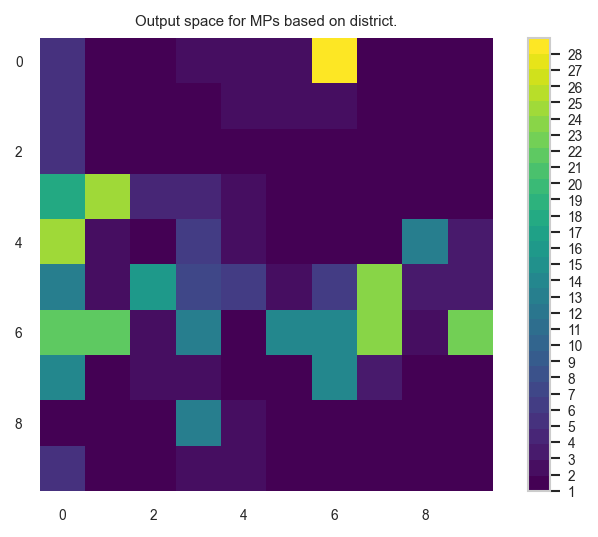

In [7]:
# plot by district

district_map = som.map_labels_to_output_space(votes, district)
n_districts = np.unique(district).size

fig, ax = plt.subplots()
mappable = ax.imshow(district_map, cmap=plt.cm.get_cmap('viridis', n_districts))

# We must be sure to specify the ticks matching our target names
cbar = plt.colorbar(mappable, ticks=list(range(n_districts)), ax=ax);

for _, spine in ax.spines.items():
    spine.set_visible(False)

# ax.set_xticks([])
# ax.set_xticks([], minor=True)
# ax.set_yticks([])
# ax.set_yticks([], minor=True)
ax.grid(False)

ax.set_title('Output space for MPs based on district.')
plt.show()